# Time Series Forecasting of SuperStore's Sales and Profits using FBProphet Model

In [1]:
# Importing the necessary packages

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

#importing prophet

import prophet

In [3]:
# Loading the data

df_original = pd.read_csv('/content/Super_Store.csv', encoding='unicode_escape')

In [4]:
# Filtering only the required columns.
# Considering only Order Date, Sub category - Book Cases, Sales

df = df_original[['Order Date', 'Sub-Category', 'Sales']]
df.head()

,Order Date,Sub-Category,Sales
0,11-08-2016,Bookcases,261.9600
1,11-08-2016,Chairs,731.9400
2,10-11-2015,Tables,957.5775
3,06-09-2014,Furnishings,48.8600
4,06-09-2014,Tables,1706.1840


In [5]:
# Different Sub-Categories available:

df['Sub-Category'].value_counts()

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

In [6]:
# Filtering for Bookcases only:

df = df[df['Sub-Category'] == 'Bookcases']

In [7]:
# Checking the Data types of the data

df.dtypes

Order Date       object
Sub-Category     object
Sales           float64
dtype: object

In [8]:
# Since the date object is in mixed format, fixing it:

df['Order Date'] = df['Order Date'].apply(lambda x : x.replace('/','-'))

In [9]:
# Converting the datatype of Month from object to time stamp.

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m-%d-%Y')

In [10]:
# Now since that we know the sub category chosen is exclusively Bookcases, dropping that column:

df.drop('Sub-Category', axis=1,inplace=True)

In [11]:
df.head()

,Order Date,Sales
0,2016-11-08,261.9600
7,2015-09-17,3083.4300
10,2015-12-27,532.3992
40,2015-10-12,899.1360
41,2015-10-12,626.3520


In [12]:
# Sorting the dates as per sequential order:

df = df.sort_values(by='Order Date')

In [14]:
# Checking the number of rows:

df.shape[0]

228

In [15]:
# Checking if all date values are unique

df['Order Date'].nunique()

200

In [16]:
# Since only 200 unique dates are present, will need to groupby the dates using the aggregate sum.

df = df.groupby('Order Date').sum().reset_index()

In [17]:
# Now, Checking the number of rows:

df.shape[0]

200

In [18]:
# Now getting the dataset ready for FB Prophet model:

df_prophet = df.rename(columns={'Order Date':'ds', 'Sales':'y'})

In [20]:
# Checking the head of the data:

df_prophet.head()

,ds,y
0,2014-01-13,333.999
1,2014-01-14,61.960
2,2014-01-19,181.470
3,2014-01-26,141.960
4,2014-01-31,290.666


In [21]:
# Fitting the prophet model:

from prophet import Prophet
m = Prophet()
model = m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/p_ysjgio.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/4m0skkz2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95483', 'data', 'file=/tmp/tmphg5yit0j/p_ysjgio.json', 'init=/tmp/tmphg5yit0j/4m0skkz2.json', 'output', 'file=/tmp/tmphg5yit0j/prophet_model92ffsgq8/prophet_model-20231013061222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:12:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [23]:
# Making future data for the next 100 days

future_values = model.make_future_dataframe(periods=100, freq='D')

In [24]:
future_values.tail()

,ds
295,2018-04-05
296,2018-04-06
297,2018-04-07
298,2018-04-08
299,2018-04-09


In [25]:
# Predicting using the model:

predictions = model.predict(future_values)

In [36]:
# Checking the predicted figures:

pred_final = predictions[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
pred_final.tail(100)

,ds,yhat_lower,yhat,yhat_upper
200,2017-12-31,-358.110739,601.864423,1600.890134
201,2018-01-01,-461.698811,584.783219,1637.948276
202,2018-01-02,-779.986280,310.770332,1291.836520
203,2018-01-03,-344.704225,622.096556,1672.007070
204,2018-01-04,-143.838982,904.981547,1947.626431
205,2018-01-05,-514.551917,506.203077,1572.539049
206,2018-01-06,-566.425913,498.900729,1577.498534
207,2018-01-07,-459.945644,601.770950,1645.292270
208,2018-01-08,-517.029452,540.448321,1661.199952
209,2018-01-09,-863.274202,222.283413,1280.850895


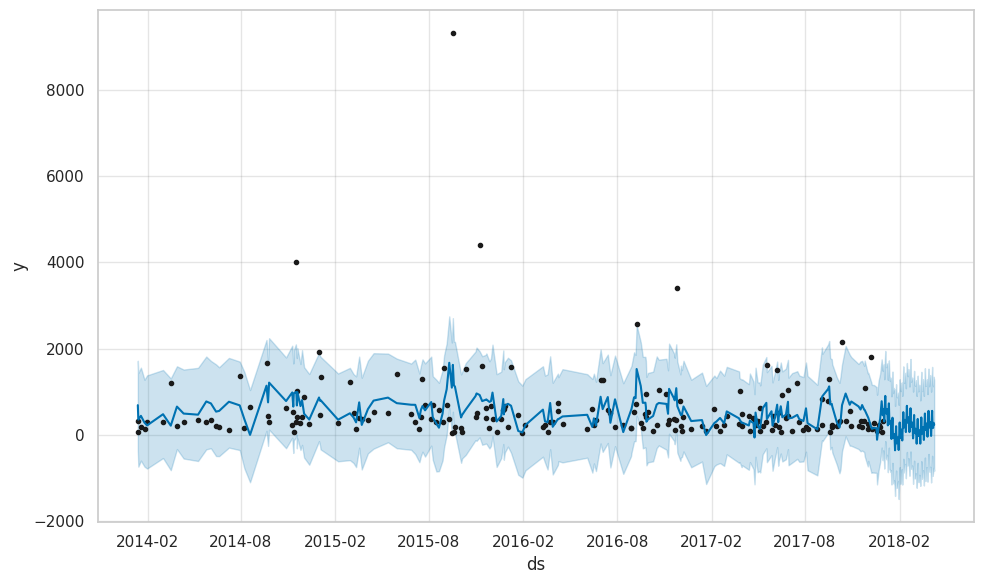

In [27]:
# Plotting the predictions

model.plot(predictions)
plt.show()

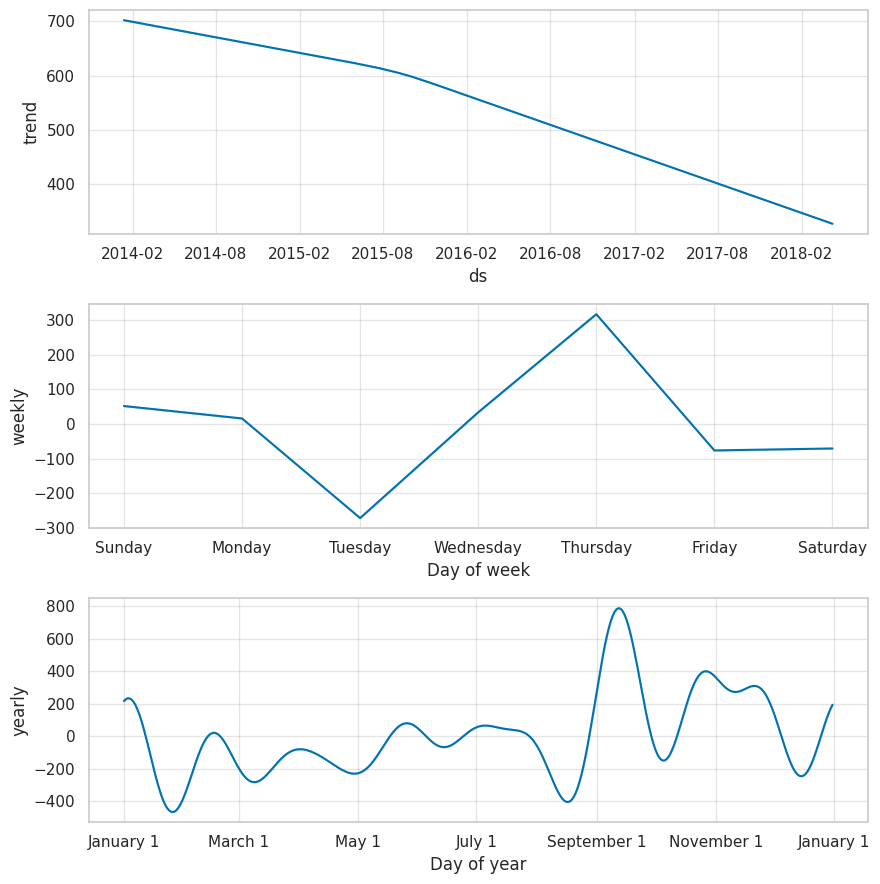

In [29]:
# Checking the trends on different components

model.plot_components(predictions)
plt.show()

In [30]:
# The sales can be seen to be decreasing over the months and estimating highest sales in the month of September and on Thursdays of every week

In [31]:
# Cross Validating the model:

from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon='30 days', period='15 days', initial = '90 days')

INFO:prophet:Making 85 forecasts with cutoffs between 2014-04-13 00:00:00 and 2017-11-30 00:00:00


  0%|          | 0/85 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/d0dq6zo_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/g6rv9if2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14663', 'data', 'file=/tmp/tmphg5yit0j/d0dq6zo_.json', 'init=/tmp/tmphg5yit0j/g6rv9if2.json', 'output', 'file=/tmp/tmphg5yit0j/prophet_model4k2k35ta/prophet_model-20231013061808.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:18:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/1jrp1681.json
DEBUG:cmdstanpy:input tempfile

In [33]:
# Evaluating the model's performance:

from prophet.diagnostics import performance_metrics
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,1.582714e+07,3978.334401,1870.461490,8.678539,1.741999,1.122509,0.749386
1,5 days,1.478543e+07,3845.182739,1823.529277,8.196948,1.516949,1.115538,0.732733
2,6 days,5.486399e+06,2342.306325,1135.350434,3.972742,1.434905,1.189826,0.774775
3,7 days,9.301661e+06,3049.862488,1412.806318,2.843914,1.288777,1.195857,0.750000
4,8 days,1.194441e+07,3456.068984,1803.442466,3.589751,1.132684,1.206790,0.652510
5,9 days,2.173952e+07,4662.565598,2263.279501,4.789425,1.462587,1.216405,0.621622
6,10 days,2.803313e+07,5294.632303,2545.876071,5.148225,1.389068,1.197198,0.522523
7,11 days,2.365752e+07,4863.899748,1967.514693,4.059686,0.984545,1.037061,0.652807
8,12 days,1.920866e+07,4382.768086,1841.110245,5.814017,0.931649,0.993534,0.694595
9,13 days,1.188203e+07,3447.031750,1498.219916,5.883928,0.971584,1.079482,0.764865


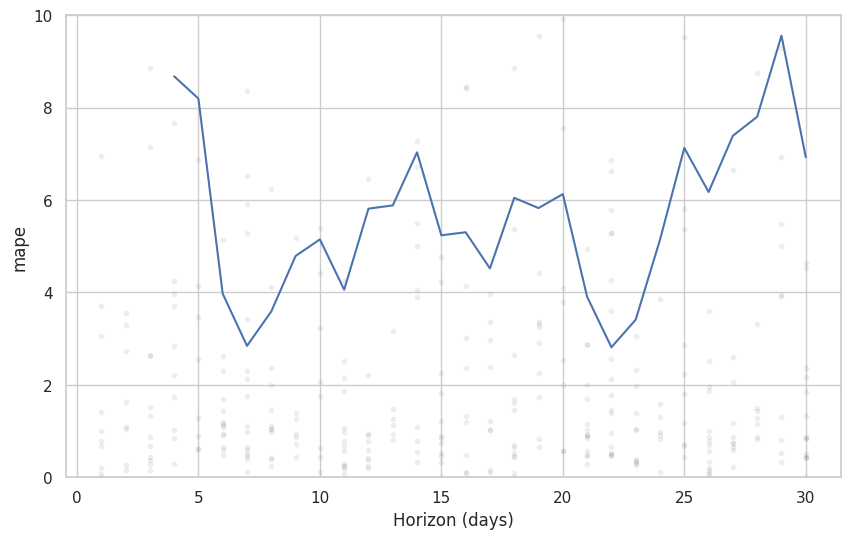

In [34]:
# Plotting the performance of the model:

from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='mape')
plt.ylim(0,10)
plt.show()

In [35]:
# The model is showing great forecasting ability with MAPE of less than 10%

## Following the same approach to forecast the sales of Furnishings

In [38]:
# Filtering only the required columns.
# Considering only Order Date, Sub category - Furnishings, Sales

df = df_original[['Order Date', 'Sub-Category', 'Sales']]
df.head()

,Order Date,Sub-Category,Sales
0,11-08-2016,Bookcases,261.9600
1,11-08-2016,Chairs,731.9400
2,10-11-2015,Tables,957.5775
3,06-09-2014,Furnishings,48.8600
4,06-09-2014,Tables,1706.1840


In [41]:
# Filtering for Furnishings only:

df = df[df['Sub-Category'] == 'Furnishings']
df.head()

,Order Date,Sub-Category,Sales
3,06-09-2014,Furnishings,48.86
8,9/17/2015,Furnishings,124.20
9,12-08-2016,Furnishings,190.92
12,4/18/2015,Furnishings,6.16
15,11/24/2015,Furnishings,79.76


In [40]:
# Checking the Data types of the data

df.dtypes

Order Date       object
Sub-Category     object
Sales           float64
dtype: object

In [42]:
# Since the date object is in mixed format, fixing it:

df['Order Date'] = df['Order Date'].apply(lambda x : x.replace('/','-'))

In [43]:
# Converting the datatype of Month from object to time stamp.

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m-%d-%Y')

In [44]:
# Now since that we know the sub category chosen is exclusively Furnishings, dropping that column:

df.drop('Sub-Category', axis=1,inplace=True)

In [45]:
# Sorting the dates as per sequential order:

df = df.sort_values(by='Order Date')

In [46]:
df.head()

,Order Date,Sales
1626,2014-01-07,76.728
181,2014-01-10,51.940
150,2014-01-11,9.940
200,2014-01-16,127.104
233,2014-01-20,38.600


In [47]:
# Checking the number of rows:

df.shape[0]

957

In [48]:
# Checking if all date values are unique

df['Order Date'].nunique()

599

In [49]:
# Since only 599 unique dates are present, will need to groupby the dates using the aggregate sum.

df = df.groupby('Order Date').sum().reset_index()

In [50]:
# Now, Checking the number of rows:

df.shape[0]

599

In [51]:
# Now getting the dataset ready for FB Prophet model:

df_prophet = df.rename(columns={'Order Date':'ds', 'Sales':'y'})

In [52]:
# Checking the head of the data:

df_prophet.head()

,ds,y
0,2014-01-07,76.728
1,2014-01-10,51.940
2,2014-01-11,9.940
3,2014-01-16,127.104
4,2014-01-20,345.570


In [53]:
# Fitting the prophet model:

from prophet import Prophet
m = Prophet()
model = m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/p5v82uwq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/c4pjmd2o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93864', 'data', 'file=/tmp/tmphg5yit0j/p5v82uwq.json', 'init=/tmp/tmphg5yit0j/c4pjmd2o.json', 'output', 'file=/tmp/tmphg5yit0j/prophet_model3d4d_8ha/prophet_model-20231013063639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:36:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:36:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [54]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [57]:
# Making future data for the next 122 days

future_values = model.make_future_dataframe(periods=122, freq='D')

In [58]:
future_values.tail()

,ds
716,2018-04-26
717,2018-04-27
718,2018-04-28
719,2018-04-29
720,2018-04-30


In [59]:
# Predicting using the model:

predictions = model.predict(future_values)

In [61]:
# Checking the predicted figures:

pred_final = predictions[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
pred_final.tail(122)

,ds,yhat_lower,yhat,yhat_upper
599,2017-12-30,-14.437820,251.250588,513.102395
600,2017-12-31,-6.424650,275.056752,531.352497
601,2018-01-01,-56.073435,238.125714,506.706434
602,2018-01-02,5.140171,269.592655,549.466992
603,2018-01-03,-46.288720,226.189533,490.995278
604,2018-01-04,-35.794346,235.898915,510.119313
605,2018-01-05,1.079166,269.433784,551.687544
606,2018-01-06,-39.479748,227.671768,510.163361
607,2018-01-07,-31.278728,245.255449,509.821055
608,2018-01-08,-60.336868,202.525197,471.748928


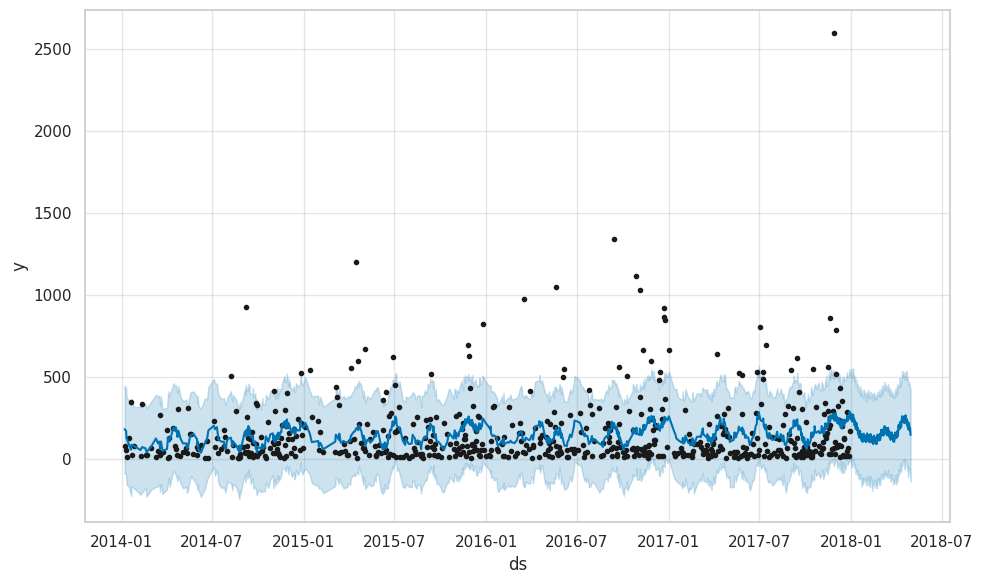

In [62]:
# Plotting the predictions

model.plot(predictions)
plt.show()

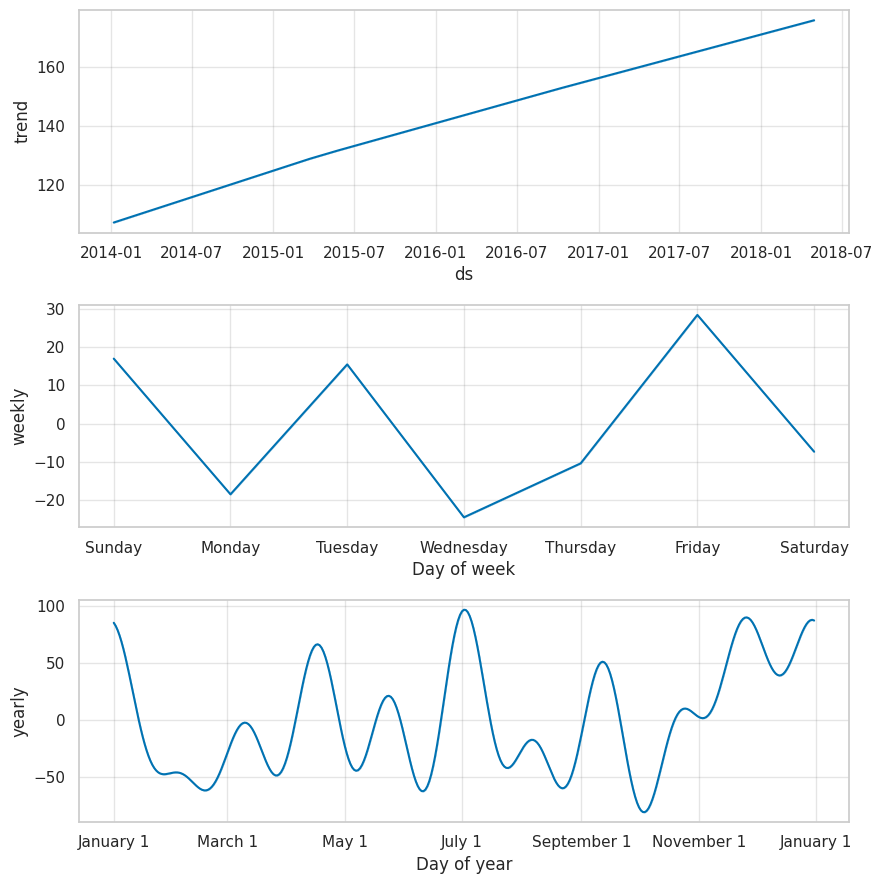

In [63]:
# Checking the trends on different components

model.plot_components(predictions)
plt.show()

In [64]:
# The sales of Furnishings can be seen to be incereasing over the months and estimating highest sales in the month of July and on Fridays of every week.

In [73]:
# Cross Validating the model:

from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon='40 days', period='20 days', initial = '100 days')

INFO:prophet:Making 66 forecasts with cutoffs between 2014-04-29 00:00:00 and 2017-11-19 00:00:00


  0%|          | 0/66 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/c_b5qccq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/3xxpb29n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56757', 'data', 'file=/tmp/tmphg5yit0j/c_b5qccq.json', 'init=/tmp/tmphg5yit0j/3xxpb29n.json', 'output', 'file=/tmp/tmphg5yit0j/prophet_model8nl7fw_a/prophet_model-20231013064259.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:42:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:42:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/zvtiivc1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/_9jehnmo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

In [74]:
# Evaluating the model's performance:

from prophet.diagnostics import performance_metrics
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,5 days,8.199554e+04,286.348637,192.664781,5.005867,1.858769,1.071550,0.799286
1,6 days,7.854997e+04,280.267680,187.346785,5.299481,1.897203,1.065677,0.791149
2,7 days,9.510197e+04,308.386068,198.625139,4.802611,1.698348,1.030116,0.779891
3,8 days,1.206960e+05,347.413275,210.481719,4.104493,1.514275,1.024029,0.779876
4,9 days,2.251903e+05,474.542199,242.735318,5.402139,1.444293,1.054646,0.773329
5,10 days,2.766111e+05,525.938280,266.255686,5.761140,1.143614,1.038253,0.768908
6,11 days,4.365982e+05,660.755808,309.403673,12.695546,1.419466,1.070821,0.760302
7,12 days,5.143020e+05,717.148554,347.375421,12.762487,1.471225,1.089619,0.723214
8,13 days,5.524708e+05,743.283815,362.431671,12.602914,1.057215,1.071813,0.707908
9,14 days,6.096382e+05,780.793337,373.882077,13.971739,1.213931,1.072402,0.689963


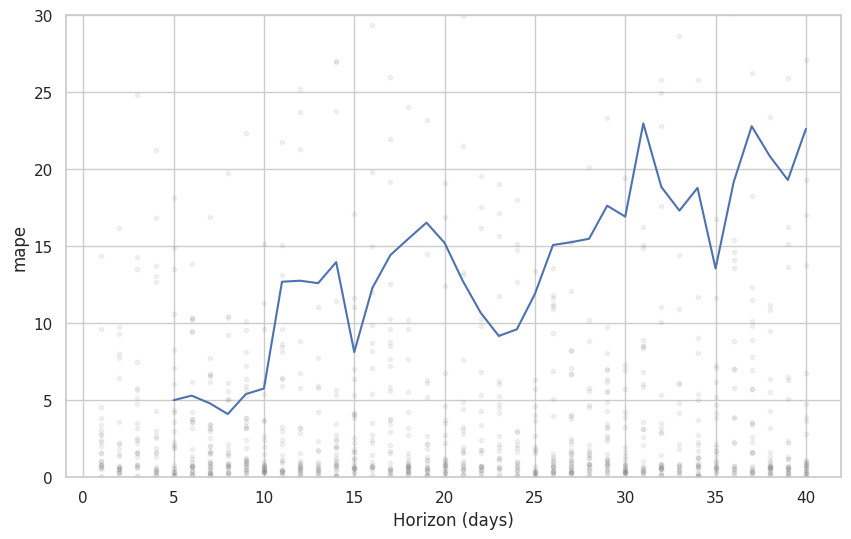

In [75]:
# Plotting the performance of the model:

from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='mape')
plt.ylim(0,30)
plt.show()

In [76]:
# The model is showing good forecasting ability with MAPE of around and mostly less than 20%

## Following the same approach to forecast the Profits of Bookcases

In [78]:
# Filtering only the required columns.
# Considering only Order Date, Sub category - Book Cases, Profit

df = df_original[['Order Date', 'Sub-Category', 'Profit']]
df.head()

,Order Date,Sub-Category,Profit
0,11-08-2016,Bookcases,41.9136
1,11-08-2016,Chairs,219.5820
2,10-11-2015,Tables,-383.0310
3,06-09-2014,Furnishings,14.1694
4,06-09-2014,Tables,85.3092


In [80]:
# Filtering for Bookcases only:

df = df[df['Sub-Category'] == 'Bookcases']
df.head()

,Order Date,Sub-Category,Profit
0,11-08-2016,Bookcases,41.9136
7,9/17/2015,Bookcases,-1665.0522
10,12/27/2015,Bookcases,-46.9764
40,10-12-2015,Bookcases,112.3920
41,10-12-2015,Bookcases,46.9764


In [81]:
# Since the date object is in mixed format, fixing it:

df['Order Date'] = df['Order Date'].apply(lambda x : x.replace('/','-'))

In [82]:
# Converting the datatype of Month from object to time stamp.

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m-%d-%Y')

In [83]:
# Now since that we know the sub category chosen is exclusively Bookcases, dropping that column:

df.drop('Sub-Category', axis=1,inplace=True)

In [84]:
# Sorting the dates as per sequential order:

df = df.sort_values(by='Order Date')

In [85]:
# Checking the number of rows:

df.shape[0]

228

In [86]:
# Checking if all date values are unique

df['Order Date'].nunique()

200

In [87]:
# Since only 200 unique dates are present, will need to groupby the dates using the aggregate sum.

df = df.groupby('Order Date').sum().reset_index()

In [88]:
# Now, Checking the number of rows:

df.shape[0]

200

In [90]:
# Now getting the dataset ready for FB Prophet model:

df_prophet = df.rename(columns={'Order Date':'ds', 'Profit':'y'})

In [91]:
# Checking the head of the data:

df_prophet.head()

,ds,y
0,2014-01-13,3.9294
1,2014-01-14,-53.2856
2,2014-01-19,-320.5970
3,2014-01-26,39.7488
4,2014-01-31,3.4196


In [92]:
# Fitting the prophet model:

from prophet import Prophet
m = Prophet()
model = m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/zenqatrs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/fnefu1s9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68616', 'data', 'file=/tmp/tmphg5yit0j/zenqatrs.json', 'init=/tmp/tmphg5yit0j/fnefu1s9.json', 'output', 'file=/tmp/tmphg5yit0j/prophet_model23lccdlg/prophet_model-20231013065008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:50:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:50:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [93]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [96]:
# Making future data for the next 121 days

future_values = model.make_future_dataframe(periods=121, freq='D')
future_values.tail()

,ds
316,2018-04-26
317,2018-04-27
318,2018-04-28
319,2018-04-29
320,2018-04-30


In [97]:
# Predicting using the model:

predictions = model.predict(future_values)

In [99]:
# Checking the predicted figures:

pred_final = predictions[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
pred_final.tail(121)

,ds,yhat_lower,yhat,yhat_upper
200,2017-12-31,-230.068894,-15.447483,214.490965
201,2018-01-01,-253.197859,-25.742926,202.202159
202,2018-01-02,-246.672652,-27.407682,189.381754
203,2018-01-03,-94.925270,112.745840,341.002562
204,2018-01-04,-324.286159,-99.752478,124.066448
205,2018-01-05,-196.474597,16.842944,217.990206
206,2018-01-06,-240.656382,-35.654668,191.180482
207,2018-01-07,-220.944172,5.342947,233.001004
208,2018-01-08,-242.267393,-4.757741,212.111440
209,2018-01-09,-215.144417,-6.182842,217.145159


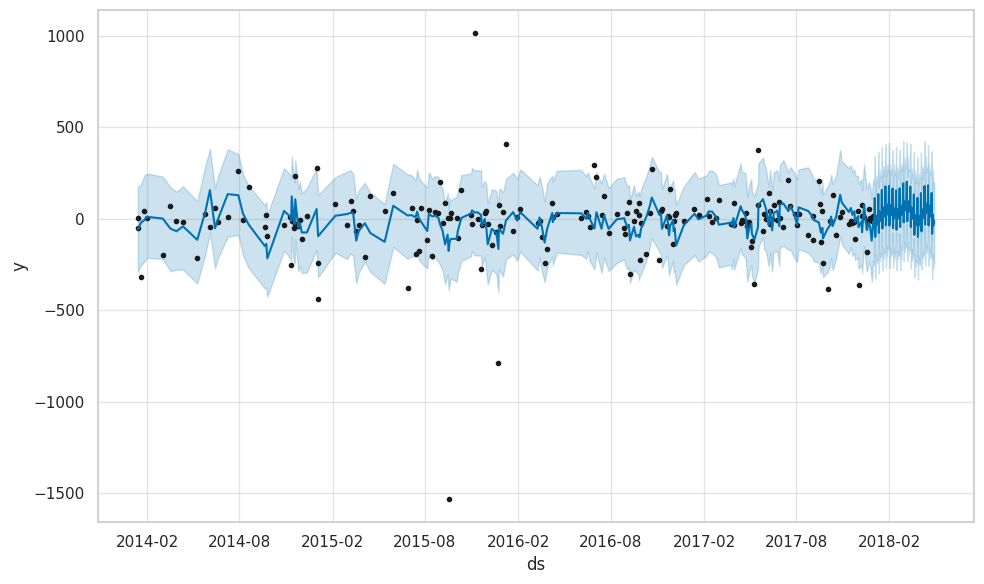

In [100]:
# Plotting the predictions

model.plot(predictions)
plt.show()

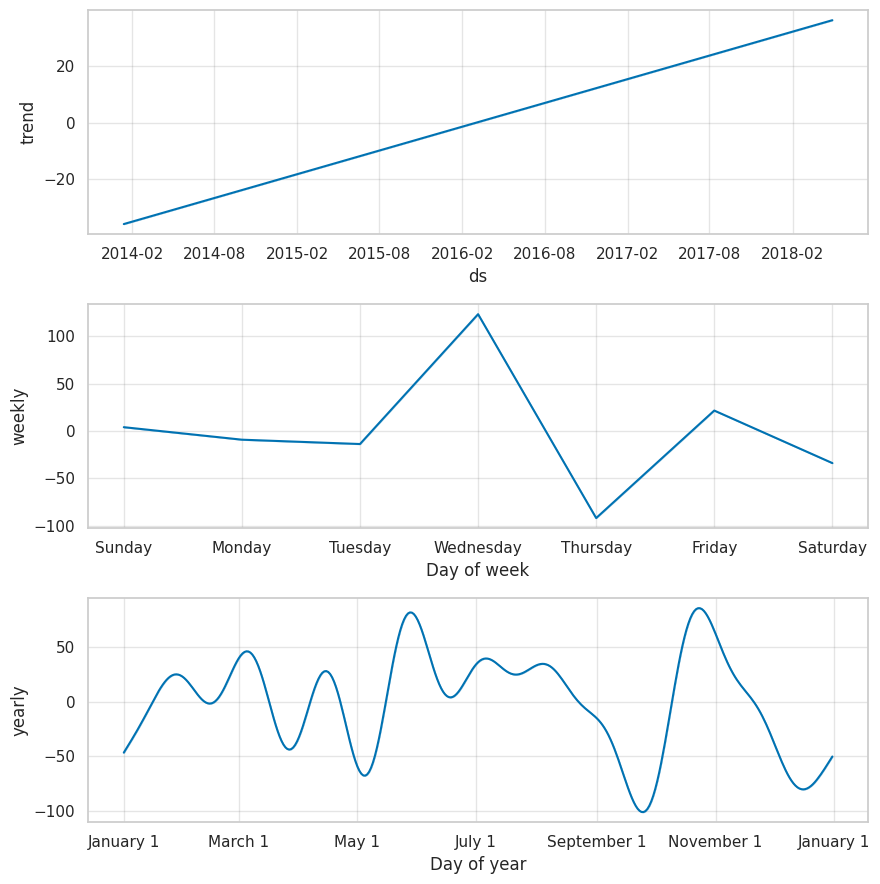

In [101]:
# Checking the trends on different components

model.plot_components(predictions)
plt.show()

In [ ]:
# The Profit of book cases can be seen to be increasing over the months and estimating highest profit in the month of November and on Wednesdays of every week

In [102]:
# Cross Validating the model:

from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon='30 days', period='15 days', initial = '90 days')

INFO:prophet:Making 85 forecasts with cutoffs between 2014-04-13 00:00:00 and 2017-11-30 00:00:00


  0%|          | 0/85 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/wvoe1f_t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/98e3g_hi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90151', 'data', 'file=/tmp/tmphg5yit0j/wvoe1f_t.json', 'init=/tmp/tmphg5yit0j/98e3g_hi.json', 'output', 'file=/tmp/tmphg5yit0j/prophet_modeljfz_5nzq/prophet_model-20231013065344.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:53:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:53:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/r6ry1lek.json
DEBUG:cmdstanpy:input tempfile

In [105]:
# Evaluating the model's performance:

from prophet.diagnostics import performance_metrics
performance_metrics(df_cv)

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,4 days,3.533071e+05,594.396387,349.319181,1.446895,1.452028,0.687961
1,5 days,3.008214e+05,548.471851,328.754566,1.682304,1.492865,0.693694
2,6 days,1.940305e+05,440.488895,251.566930,1.502894,1.625252,0.765766
3,7 days,2.381247e+05,487.980222,276.869043,1.630104,1.651480,0.695946
4,8 days,1.180666e+06,1086.584420,526.979553,1.984138,1.697075,0.625483
5,9 days,1.449712e+06,1204.039779,616.653252,2.347381,1.702806,0.603604
6,10 days,1.722598e+06,1312.477905,682.553094,2.913625,1.718842,0.561562
7,11 days,1.008270e+06,1004.126383,470.604463,4.107497,1.735632,0.661123
8,12 days,2.421315e+06,1556.057582,561.556955,4.569301,1.782314,0.664865
9,13 days,2.433983e+06,1560.122877,552.586845,4.091435,1.767098,0.713514


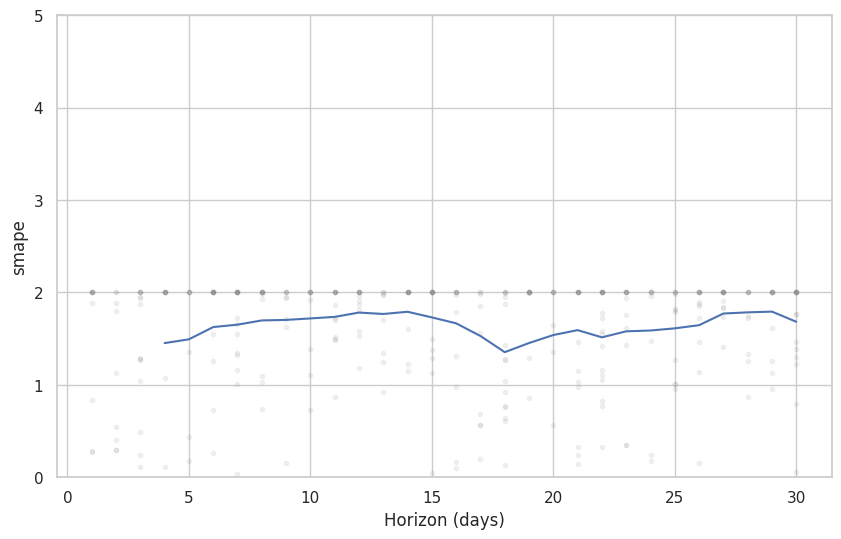

In [107]:
# Plotting the performance of the model:

from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='smape')
plt.ylim(0,5)
plt.show()

In [108]:
# The model is showing great forecasting ability with SMAPE close to 0%

## Following the same approach to forecast the Profits of Furnishings

In [109]:
# Filtering only the required columns.
# Considering only Order Date, Sub category - Furnishings, Profit

df = df_original[['Order Date', 'Sub-Category', 'Profit']]
df.head()

,Order Date,Sub-Category,Profit
0,11-08-2016,Bookcases,41.9136
1,11-08-2016,Chairs,219.5820
2,10-11-2015,Tables,-383.0310
3,06-09-2014,Furnishings,14.1694
4,06-09-2014,Tables,85.3092


In [110]:
# Filtering for Bookcases only:

df = df[df['Sub-Category'] == 'Furnishings']

In [111]:
# Since the date object is in mixed format, fixing it:

df['Order Date'] = df['Order Date'].apply(lambda x : x.replace('/','-'))

In [113]:
# Converting the datatype of Month from object to time stamp.

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m-%d-%Y')
df.head()

,Order Date,Sub-Category,Profit
3,2014-06-09,Furnishings,14.1694
8,2015-09-17,Furnishings,15.5250
9,2016-12-08,Furnishings,-147.9630
12,2015-04-18,Furnishings,2.9568
15,2015-11-24,Furnishings,22.3328


In [114]:
# Now since that we know the sub category chosen is exclusively Furnishings, dropping that column:

df.drop('Sub-Category', axis=1,inplace=True)

In [116]:
# Sorting the dates as per sequential order:

df = df.sort_values(by='Order Date')

In [117]:
# Checking the number of rows:

df.shape[0]

957

In [118]:
# Checking if all date values are unique

df['Order Date'].nunique()

599

In [119]:
# Since only 200 unique dates are present, will need to groupby the dates using the aggregate sum.

df = df.groupby('Order Date').sum().reset_index()

In [120]:
# Now, Checking the number of rows:

df.shape[0]

599

In [122]:
# Now getting the dataset ready for FB Prophet model:

df_prophet = df.rename(columns={'Order Date':'ds', 'Profit':'y'})

In [123]:
# Checking the head of the data:

df_prophet.head()

,ds,y
0,2014-01-07,-53.7096
1,2014-01-10,21.2954
2,2014-01-11,3.0814
3,2014-01-16,28.5984
4,2014-01-20,52.2543


In [124]:
# Fitting the prophet model:

from prophet import Prophet
m = Prophet()
model = m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/yrtgbpn0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/pma6gr7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3269', 'data', 'file=/tmp/tmphg5yit0j/yrtgbpn0.json', 'init=/tmp/tmphg5yit0j/pma6gr7w.json', 'output', 'file=/tmp/tmphg5yit0j/prophet_modelnhkq8xe_/prophet_model-20231013070553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [125]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [128]:
# Making future data for the next 122 days

future_values = model.make_future_dataframe(periods=122, freq='D')
future_values.tail()

,ds
716,2018-04-26
717,2018-04-27
718,2018-04-28
719,2018-04-29
720,2018-04-30


In [129]:
# Predicting using the model:

predictions = model.predict(future_values)

In [130]:
# Checking the predicted figures:

pred_final = predictions[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
pred_final.tail(122)

,ds,yhat_lower,yhat,yhat_upper
599,2017-12-30,-47.993698,37.169141,123.898451
600,2017-12-31,-34.071878,48.890215,130.898805
601,2018-01-01,-41.801765,47.554687,137.519145
602,2018-01-02,-43.552019,45.728907,131.627999
603,2018-01-03,-44.434848,33.448044,118.563591
604,2018-01-04,-49.705789,35.688962,127.070659
605,2018-01-05,-40.499790,42.742692,128.389605
606,2018-01-06,-54.233051,29.274088,114.707018
607,2018-01-07,-46.838967,38.637551,120.791564
608,2018-01-08,-45.977746,35.138223,125.365650


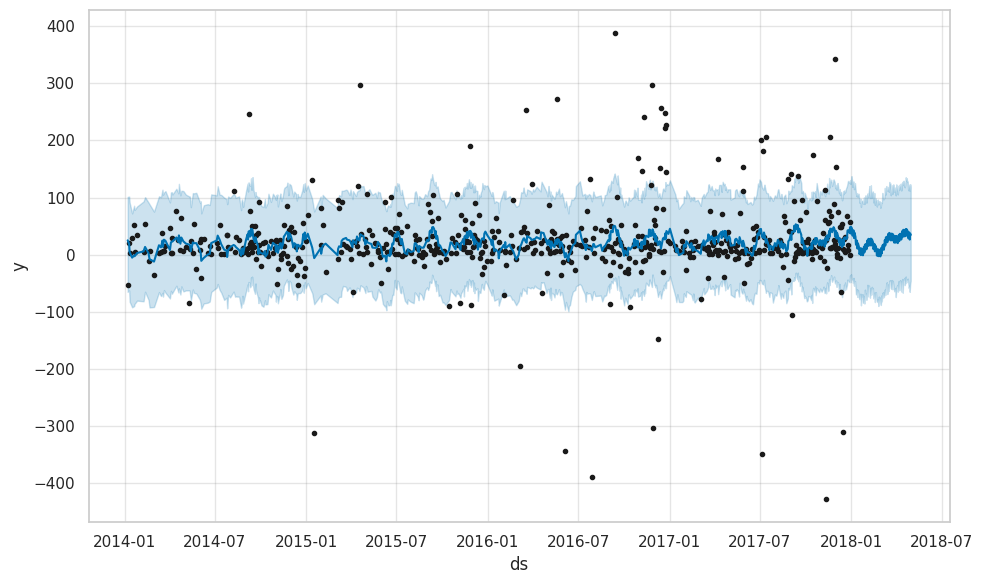

In [131]:
# Plotting the predictions

model.plot(predictions)
plt.show()

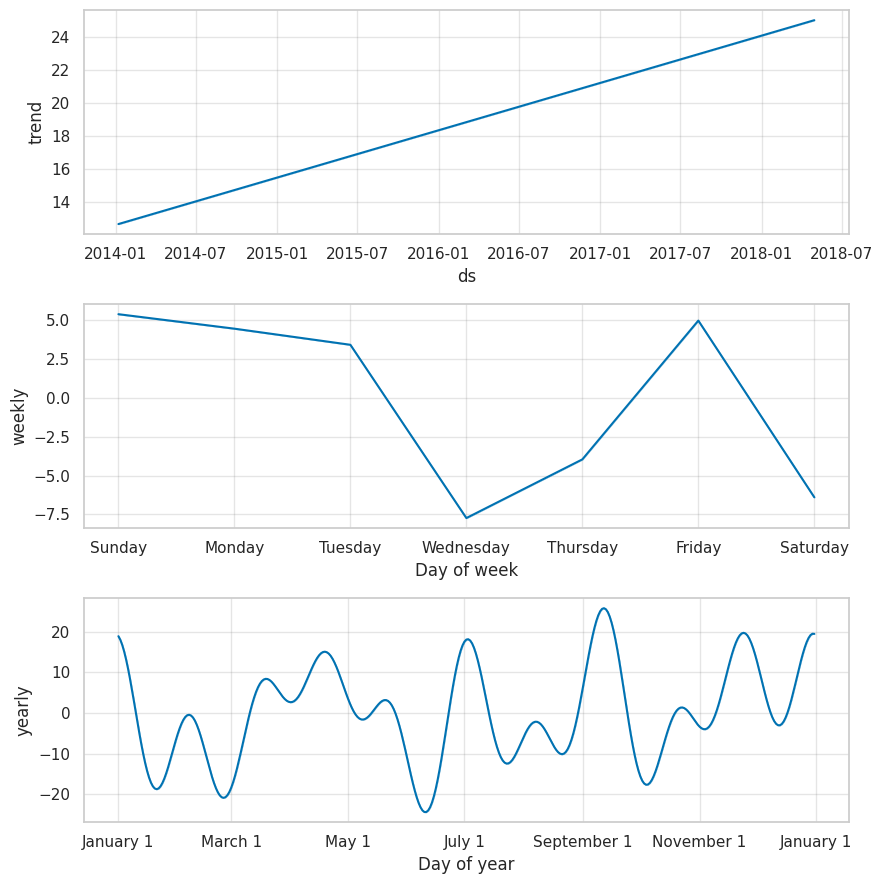

In [132]:
# Checking the trends on different components

model.plot_components(predictions)
plt.show()

In [133]:
# The profuts from furnishings is forecasted to be increasing over the months and estimating highest profit in the month of September and on Sundays of every week

In [134]:
# Cross Validating the model:

from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon='30 days', period='15 days', initial = '90 days')

INFO:prophet:Making 89 forecasts with cutoffs between 2014-04-19 00:00:00 and 2017-11-29 00:00:00


  0%|          | 0/89 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/tjjava_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/i3kksxb_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91997', 'data', 'file=/tmp/tmphg5yit0j/tjjava_8.json', 'init=/tmp/tmphg5yit0j/i3kksxb_.json', 'output', 'file=/tmp/tmphg5yit0j/prophet_modela0dfnlyk/prophet_model-20231013070849.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:08:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg5yit0j/nortsckd.json
DEBUG:cmdstanpy:input tempfi

In [135]:
# Evaluating the model's performance:

from prophet.diagnostics import performance_metrics
performance_metrics(df_cv)

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,4 days,8445.276260,91.898184,55.072458,1.160109,1.304460,0.731416
1,5 days,8650.542995,93.008295,55.758099,1.040025,1.294155,0.717699
2,6 days,12170.746642,110.321107,66.872710,1.159723,1.315733,0.653952
3,7 days,15949.679557,126.292041,69.667010,1.087042,1.239683,0.677224
4,8 days,23942.767151,154.734505,83.916749,1.211058,1.298187,0.672046
5,9 days,22904.844735,151.343466,68.859363,0.985998,1.166284,0.771176
6,10 days,31301.879928,176.923373,82.759905,1.021288,1.209557,0.717280
7,11 days,29221.429560,170.942767,77.555309,1.021288,1.162082,0.734297
8,12 days,27468.351423,165.735788,81.570812,1.234045,1.260366,0.719248
9,13 days,21520.979974,146.700307,69.749777,1.114559,1.213678,0.745755


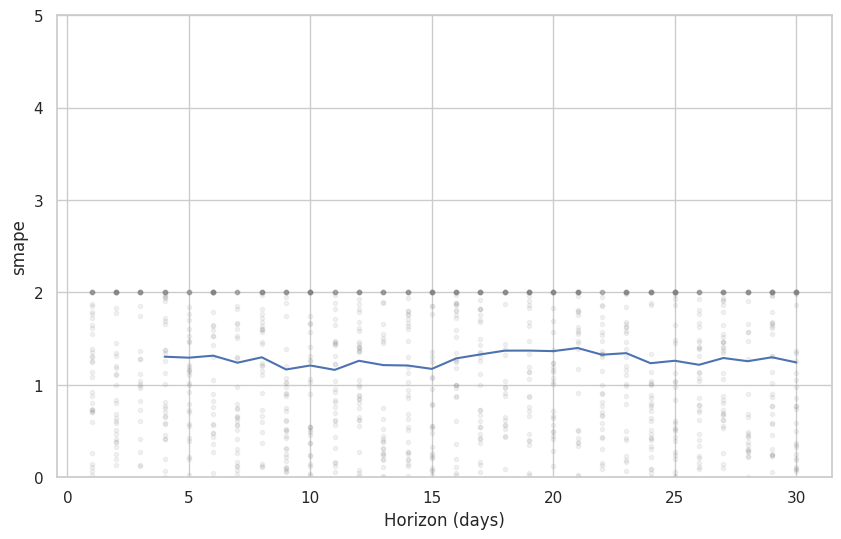

In [138]:
# Plotting the performance of the model:

from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='smape')
plt.ylim(0,5)
plt.show()

In [139]:
# The model is showing great forecasting ability with SMAPE close to 1%